                     Used capacity
Time                              
2020-06-28 22:00:01   2.504977e+09
2020-06-28 22:01:01   2.504988e+09
2020-06-28 22:02:01   2.504988e+09
2020-06-28 22:03:01   2.504983e+09
2020-06-28 22:04:01   2.504983e+09
2020-06-29 12:03:48   2.498691e+09
2020-06-29 12:04:48   2.498691e+09
2020-06-29 12:05:48   2.498687e+09
2020-06-29 12:06:48   2.499442e+09
2020-06-29 12:07:48   2.499447e+09
2020-06-30 22:00:01   2.504973e+09
2020-06-30 22:01:01   2.504974e+09
2020-06-30 22:02:01   2.504975e+09
2020-06-30 22:03:01   2.504976e+09
2020-06-30 22:04:01   2.504977e+09
2020-07-01 22:00:01   2.504969e+09
2020-07-01 22:01:01   2.504970e+09
2020-07-01 22:02:01   2.504971e+09
2020-07-01 22:03:01   2.504971e+09
2020-07-01 22:04:01   2.504972e+09
2020-07-02 22:00:01   2.504964e+09
2020-07-02 22:01:01   2.504965e+09
2020-07-02 22:02:01   2.504966e+09
2020-07-02 22:03:01   2.504967e+09
2020-07-02 22:04:01   2.504968e+09
2020-07-03 22:00:01   2.504960e+09
2020-07-03 22:01:01 

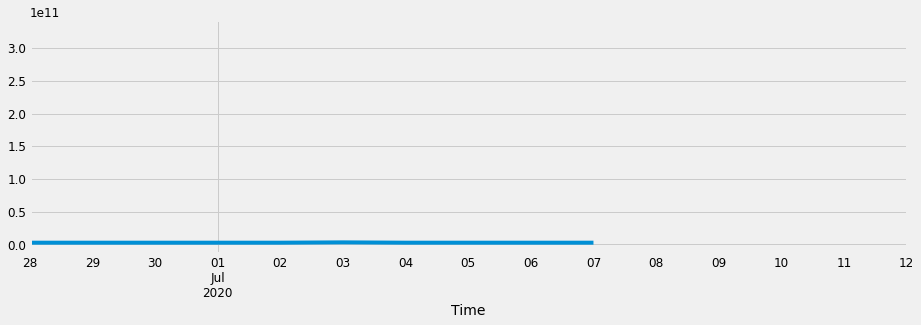

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
df = pd.read_excel("Storage Utilization.xlsx")
df['Time'].min(),df['Time'].max()

#removing columns we do not need
cols = ['Index', 'Total capacity', 'Non_HDFS_USED']
df.drop(cols, axis=1, inplace=True)
df = df.sort_values('Time')
df.isnull().sum()

#aggregate Used capacity by date
df = df.groupby('Time')['Used capacity'].sum().reset_index()

# set Time as index
df = df.set_index('Time')
df.index
print(df)

# pandas resample to get daily average with time series data - required?
y = df['Used capacity'].resample('D').mean()
print(y)

#y['2017':]
#vizualizing data
y.plot(figsize=(14, 4))
plt.show()
# Visualize our data using a method called time-series
# decomposition that allows us to decompose our time series into three distinct components:
# trend, seasonality, and noise
#from pylab import rcParams
# rcParams['figure.figsize'] = 18, 8
# decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# fig = decomposition.plot()
# plt.show()

##Autoregressive Integrated Moving Average (ARIMA)


